# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand how Eigen faces can be used to represent the images

In [1]:
#@title Experiment Walkthrough
#@markdown Eigen Faces on Celebrity dataset

from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/eigen_faces_celebrity.mp4" type="video/mp4">
</video>""")

## Dataset

### Description 

The dataset choosen for this experiment is 10 celebrity faces dataset. The dataset contains 20 images for each celebrity.  

The celebrity includes : 

* Aamir Khan
* Madhuri_Dixit
* Kamal Hassan
* Virat Kohli
* Amitabh Bachchan
* Mahendra Singh Dhoni
* A.P.J. Abdul Kalam
* Preity Zinta
* A.R. Rahman
* Vidya Balan

## AI / ML Technique

### Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

Eigenfaces are images that can be added to a mean (average) face to create new facial images. We can write this mathematically as,

 
>$ F=F_m+\sum_{i=0}^n F_{i} \alpha $



where,

F is a new face.
F_m is the mean or the average face,
F_i is an EigenFace,
$\alpha_i$ are scalar multipliers we can choose to create new faces. They can be positive or negative


 ![Alt text](https://www.learnopencv.com/wp-content/uploads/2018/01/EigenFace.jpg).
 
  **Description of the image above:** On the left is the mean image. On the right is a new face produced by adding 10 Eigenfaces with different weights (shown in center).
  
  Eigenfaces are calculated by estimating the principal components of the dataset of facial images. They are used for applications like Face Recognition and Facial Landmark Detection.
  


### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M1W4E11_Eigen_Faces" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install imageio")
    ipython.magic("sx pip install scipy==1.00")
    #ipython.magic("sx wget https://cdn.talentsprint.com/Experiment_related_data/week3/Exp5/yalefaces.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/faces.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/output_new.zip")
    ipython.magic("sx unzip faces.zip")
    ipython.magic("sx unzip output_new.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [0]:
from scipy.misc import *
from scipy import linalg
import imageio
import glob
import numpy
import os
import pdb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Function to load the images from the directory

In [0]:
def load_images(directory):
    # get a list of all the picture filenames
    jpgs = glob.glob(directory + '/*')
    #The line below might look long winded, but it basically trying to extract the name (say) Mahendra_Singh_Dhoni from a 
    #..path such as './faces/Mahendra_Singh_Dhoni_20.jpg' and then mapping this to unique id (such as 1)
    label_dict = {label:index for index, label in enumerate(numpy.unique([''.join(i.split('/')[-1].split('.')[0].split('_')[:-1]) for i in jpgs]))}
    #We use now the same logic as above, but this time to fetch the 'id' corresponding to the label in the dictionary created above
    labels = [label_dict[''.join(i.split('/')[-1].split('.')[0].split('_')[:-1])] for i in jpgs]
    # load a greyscale version of each image
    imgs = numpy.array([imresize(imread(i, True), (224, 224)).flatten() for i in jpgs])
    print(imgs.shape)
    return imgs, labels

#### Function to Calculate the eigen faces, weights for each image and mean

NOTE: We use SVD (Singular Value Decomposition) here to get our Eigen vector. It is important to note that another popular method of gettign the Eigen vectors is through PCA (Principal Component Analysis), where we perform 'Eigen Decomposition' over the co-variance matrix (which is constructed by multiplying the dataset with its own transpose after adjusting the mean). Please note however that most machine learning libraries help us find the Principal Components (Eigen vectors) simply through a function call (by using either methods mentioned)and hence it is important to focus on the idea of Principal components itself and how its useful for the ML model (as opposed to understanding the mathematics behind the same, especially if time is a premium) 

In [0]:
def pca(data):
    mu = numpy.mean(data, 0)
    # mean adjust(ma) the data
    ma_data = data - mu
    # run SVD. The e_faces variable below is what is the Eigen Vectors (also called as Eigen Basis)
    e_faces, sigma, v = linalg.svd(ma_data.transpose(), full_matrices=False)
    # we project the mean adjusted data onto these new Eigen Vectors (or Eigen Basis) to get a weight in each of those directions
    weights = numpy.dot(ma_data, e_faces)
    return e_faces, weights, mu, v

#### Function to reconstruct the image . In this function we will be performing the dot product between weights and eigen face then adding the mean value.

In [0]:
def reconstruct(img_idx, e_faces, weights, mu, npcs):
    # dot weights with the eigenfaces and add to. This should reconstruct the image back.
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

#### Function to save the image into a directory named "image"

In [0]:
def save_image(out_dir, subdir, img_id, img_dims, data):
    directory = out_dir + "/" + subdir
    if not os.path.exists(directory): os.makedirs(directory)
    imsave(directory + "/image_" + str(img_id) + ".jpg", data.reshape(img_dims))

#### Loading the new set of images

In [0]:
dir = "./faces"

In [10]:
data, labels = load_images(dir)

(200, 50176)


In [11]:
labels.count(3)

20

In [12]:
data.shape

(200, 50176)

#### Calling the PCA function and storing the eigen faces, weights and mean values

In [0]:
img_dims = (224,224)

In [0]:
e_faces, weights, mu,v = pca(data)

Plot of data in 2D in Eigen space

In [15]:
weights.shape

(200, 200)

In [16]:
e_faces.shape

(50176, 200)

### We merely show here below about how the 'weights' (unique to each image) is a feature that is good to be used for classification purposes as well (the scope of this experiment is however not classification using Eigen faces)

In [0]:
X_train, y_train = weights, labels

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [0]:
pred_labels = clf.predict(X_train)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_train, pred_labels, normalize=True)

1.0

In [22]:
confusion_matrix(pred_labels, y_train)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

## Now we plot Eigen Faces(weights) on a simple 2D plot

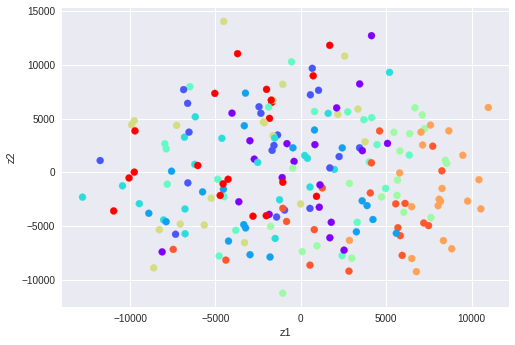

In [23]:
plt.scatter(weights[:, 0], weights[:, 1], c=labels, cmap='rainbow')
plt.xlabel('z1')
plt.ylabel('z2')
plt.savefig('Faces_in_2d.png')

### Eigen Value Spectrum (Note: we're using SVD here below to get the Eigen Values and Eigen Vectors). 

In [0]:
mu = numpy.mean(data, 0)
# mean adjust the data
ma_data = data - mu
Eigen_values, Eigen_vectors = numpy.linalg.eig(ma_data@ma_data.T)

In [25]:
Eigen_values.shape,Eigen_vectors.shape

((200,), (200, 200))

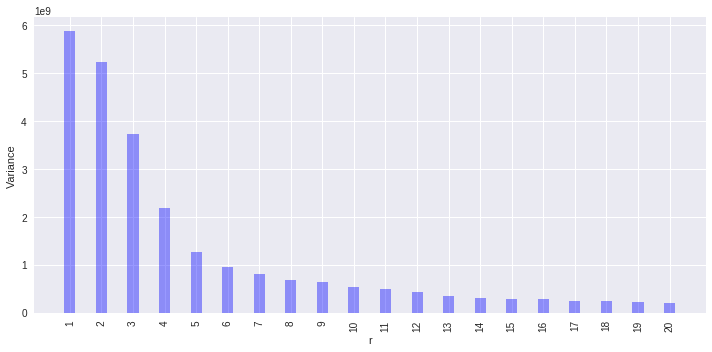

In [26]:
%matplotlib inline  

fig = plt.figure()
fig.set_size_inches(10,5)
index = numpy.arange(len(Eigen_values[:20]))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index , Eigen_values[:20], bar_width,
                 alpha=opacity,
                 color='b',
                 #yerr=std_e1,
                 #error_kw=error_config,
                 label='Eigen value Spectrum')
plt.xticks(index, numpy.arange(Eigen_values.shape[0])+1,  rotation=90)
plt.xlabel('r')
plt.ylabel('Variance')
#plt.legend()

plt.tight_layout()
plt.savefig('Eigen_values_spectrum.png')
plt.show()

In [27]:
e_faces.shape

(50176, 200)

#### Saving the mean image in output directory and displaying it

In [0]:
imsave("output_new" + "/mean.jpg", mu.reshape(img_dims))

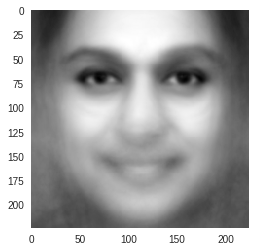

In [29]:
plt.grid(False)
plt.imshow(mu.reshape(224, 224), cmap='gray')

#### Storing the eigen faces as images in directory named "output_new" and display them here

In [0]:
for i in range(e_faces.shape[1]):
    #continue
    save_image("output_new", "eigenfaces", i, img_dims, e_faces[:,i])

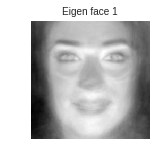

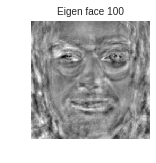

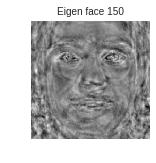

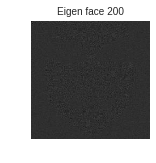

In [31]:
index = [0,99,149, 199]

for j, i in enumerate(index) :
    eigenface = "output_new/eigenfaces/image_"+str(i)+".jpg"
    title = "Eigen face " + str(i+1)
    plt.figure(figsize=(10,10))
    plt.subplot(len(index), j+1,1 )
    plt.axis('off')
    plt.imshow(imread(eigenface, True), cmap='gray')
    plt.title(title, size=10)
    plt.show()

#### Checking the shape of a eigen face

In [32]:
e_faces[:, :].shape

(50176, 200)

### Select the number of principal components for reconstruction

In [0]:
no_of_principal_components = 19

In [0]:
img_id = 66

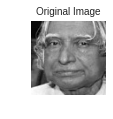

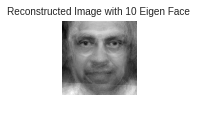

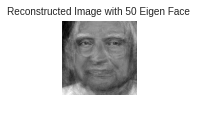

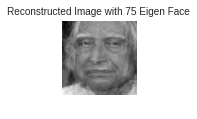

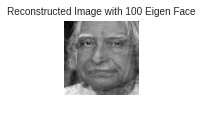

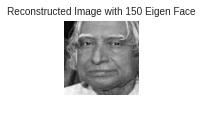

In [35]:
title = "Original Image" 
plt.figure(figsize=(3,3))
plt.subplot(2, 1,1)
plt.axis('off')
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=10)
#print(weights[img_id])
Normalised_weights = (weights[img_id]-numpy.mean(weights[img_id]))/numpy.std(weights[img_id])
#print(Normalised_weights)
for i in [9, 49,74,99,149]:
    img = reconstruct(img_id, e_faces, weights, mu, i)# To understand what this function does, please read the function description
    
    img_dims = (224,224)
    path = 'output_new/recon'
    imsave(path+"/recon"+str(i+1)+".jpg", img.reshape(img_dims))
    title = "Reconstructed Image with {} Eigen Face".format(i+1) 
    plt.figure(figsize=(3,3))
    plt.subplot(2, 1,1)
    plt.axis('off')
    plt.imshow(img.reshape(224,224), cmap='gray')
    plt.title(title, size=10)
    plt.show()

In [36]:
weights

array([[-5.45777726e+02,  1.02820809e+04,  4.48122308e+03, ...,
        -2.66614300e+01,  2.35990268e-02,  6.95887792e-13],
       [-9.75380769e+03,  8.56090510e+00, -4.83213772e+02, ...,
        -2.53764848e-01, -1.88724158e-01,  4.89830398e-13],
       [-7.82289847e+03, -1.11176428e+03, -2.14805029e+03, ...,
         2.40124695e+01,  9.22433739e-02,  1.14164234e-12],
       ...,
       [-2.97451794e+03, -7.68007834e+03,  2.57836245e+03, ...,
         2.76212981e+00, -5.49838912e-02,  1.59219860e-12],
       [-6.86486284e+03,  7.69387360e+03,  3.57462872e+03, ...,
        -1.90070737e+00, -3.38471761e-01,  7.31414929e-13],
       [ 6.48755002e+03, -3.20958365e+03,  5.20615971e+03, ...,
        -2.39461736e+01, -8.85632703e-02,  1.42375001e-12]])

#### Please answer the questions below to complete the experiment:

In [0]:
#@title To reconstruct an image and be able to display it, the 'weights' and 'Eigen faces' alone are sufficient? (Refer the 'reconstrut' function above if needed){ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE", "FALSE"]

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [44]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3356
Date of submission:  09 Apr 2019
Time of submission:  21:50:17
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
